# Importando as Bibliotecas

In [1]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import folium
from folium import plugins
import json

# Lendo o DataSet

In [2]:
eleitorado = pd.read_csv('eleitorado_2020.csv', encoding='latin1', sep=';')
eleitorado.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,CD_MUN_SIT_BIOMETRIA,DS_MUN_SIT_BIOMETRIA,NR_ZONA,CD_GENERO,...,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,CD_GRAU_ESCOLARIDADE,DS_GRAU_ESCOLARIDADE,QT_ELEITORES_PERFIL,QT_ELEITORES_BIOMETRIA,QT_ELEITORES_DEFICIENCIA,QT_ELEITORES_INC_NM_SOCIAL
0,10/09/2020,23:04:11,2020,SP,71072,SÃO PAULO,0,Sem biometria,257,4,...,3,CASADO,9094,90 a 94 anos,6,ENSINO MÉDIO COMPLETO,17,1,1,0
1,10/09/2020,23:04:11,2020,SP,71072,SÃO PAULO,0,Sem biometria,257,4,...,3,CASADO,9094,90 a 94 anos,7,SUPERIOR INCOMPLETO,1,0,0,0
2,10/09/2020,23:04:11,2020,SP,71072,SÃO PAULO,0,Sem biometria,257,4,...,3,CASADO,9094,90 a 94 anos,8,SUPERIOR COMPLETO,8,0,0,0
3,10/09/2020,23:04:11,2020,SP,71072,SÃO PAULO,0,Sem biometria,257,4,...,3,CASADO,9599,95 a 99 anos,1,ANALFABETO,28,0,0,0
4,10/09/2020,23:04:11,2020,SP,71072,SÃO PAULO,0,Sem biometria,257,4,...,3,CASADO,9599,95 a 99 anos,2,LÊ E ESCREVE,149,0,0,0


In [3]:
# Elimina as determinadas colunas 
eleitorado = eleitorado.drop(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_MUNICIPIO', 'CD_MUN_SIT_BIOMETRIA',
                              'NR_ZONA', 'CD_GENERO', 'CD_ESTADO_CIVIL', 'CD_GRAU_ESCOLARIDADE'], axis=1)
eleitorado.head()

,SG_UF,NM_MUNICIPIO,DS_MUN_SIT_BIOMETRIA,DS_GENERO,DS_ESTADO_CIVIL,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,DS_GRAU_ESCOLARIDADE,QT_ELEITORES_PERFIL,QT_ELEITORES_BIOMETRIA,QT_ELEITORES_DEFICIENCIA,QT_ELEITORES_INC_NM_SOCIAL
0,SP,SÃO PAULO,Sem biometria,FEMININO,CASADO,9094,90 a 94 anos,ENSINO MÉDIO COMPLETO,17,1,1,0
1,SP,SÃO PAULO,Sem biometria,FEMININO,CASADO,9094,90 a 94 anos,SUPERIOR INCOMPLETO,1,0,0,0
2,SP,SÃO PAULO,Sem biometria,FEMININO,CASADO,9094,90 a 94 anos,SUPERIOR COMPLETO,8,0,0,0
3,SP,SÃO PAULO,Sem biometria,FEMININO,CASADO,9599,95 a 99 anos,ANALFABETO,28,0,0,0
4,SP,SÃO PAULO,Sem biometria,FEMININO,CASADO,9599,95 a 99 anos,LÊ E ESCREVE,149,0,0,0


# Obtendo estatísticas descritivas do DataSet

In [4]:
# Verifica o tamanho do Dataset
print(f'O DataSet possui {eleitorado.shape[0]} linhas e {eleitorado.shape[1]} colunas')

O DataSet possui 4248094 linhas e 12 colunas


In [5]:
# Obtem informações descritivas do DataSet 
eleitorado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248094 entries, 0 to 4248093
Data columns (total 12 columns):
 #   Column                      Dtype 
---  ------                      ----- 
 0   SG_UF                       object
 1   NM_MUNICIPIO                object
 2   DS_MUN_SIT_BIOMETRIA        object
 3   DS_GENERO                   object
 4   DS_ESTADO_CIVIL             object
 5   CD_FAIXA_ETARIA             int64 
 6   DS_FAIXA_ETARIA             object
 7   DS_GRAU_ESCOLARIDADE        object
 8   QT_ELEITORES_PERFIL         int64 
 9   QT_ELEITORES_BIOMETRIA      int64 
 10  QT_ELEITORES_DEFICIENCIA    int64 
 11  QT_ELEITORES_INC_NM_SOCIAL  int64 
dtypes: int64(5), object(7)
memory usage: 388.9+ MB


In [6]:
# Obtem informações estatísticas do DataSet
eleitorado.describe()

,CD_FAIXA_ETARIA,QT_ELEITORES_PERFIL,QT_ELEITORES_BIOMETRIA,QT_ELEITORES_DEFICIENCIA,QT_ELEITORES_INC_NM_SOCIAL
count,4.248094e+06,4.248094e+06,4.248094e+06,4.248094e+06,4.248094e+06
mean,5.279233e+03,3.481996e+01,2.768182e+01,2.726882e-01,2.350466e-03
std,2.105586e+03,1.211392e+02,9.976254e+01,1.696011e+00,5.320090e-02
min,-3.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.539000e+03,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.054000e+03,5.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00
75%,7.074000e+03,2.100000e+01,1.600000e+01,0.000000e+00,0.000000e+00
max,9.999000e+03,6.438000e+03,6.437000e+03,3.830000e+02,7.000000e+00


In [7]:
# Seleciona determinadas colunas e aplica a função soma 
total_eleitores = eleitorado.QT_ELEITORES_PERFIL.sum()
print(f'Total de eleitores aptos a votar nas eleições:{total_eleitores}')

Total de eleitores aptos a votar nas eleições:147918483


In [8]:
# Agrupa a coluna de eleitores e aplica uma função soma
eleitorado_analfabeto = eleitorado.groupby('DS_GRAU_ESCOLARIDADE')['QT_ELEITORES_PERFIL'].sum()
eleitorado_analfabeto = eleitorado_analfabeto.loc['ANALFABETO']
print(f'Total de eleitores analfabetos: {eleitorado_analfabeto}')

Total de eleitores analfabetos: 6572249


In [9]:
# Calcula a porcetagem do grau de escolaridade por sexo dos eleitores
eleitores = eleitorado.groupby(['DS_GENERO', 'DS_GRAU_ESCOLARIDADE'])[['QT_ELEITORES_PERFIL']].sum().transform(lambda x: x / x.sum()*100)
eleitores = eleitores.applymap('{:.2f}'.format)
eleitores = eleitores.reset_index()
eleitores

,DS_GENERO,DS_GRAU_ESCOLARIDADE,QT_ELEITORES_PERFIL
0,FEMININO,ANALFABETO,2.30
1,FEMININO,ENSINO FUNDAMENTAL COMPLETO,3.30
2,FEMININO,ENSINO FUNDAMENTAL INCOMPLETO,11.91
3,FEMININO,ENSINO MÉDIO COMPLETO,14.10
4,FEMININO,ENSINO MÉDIO INCOMPLETO,7.62
5,FEMININO,LÊ E ESCREVE,3.85
6,FEMININO,NÃO INFORMADO,0.01
7,FEMININO,SUPERIOR COMPLETO,6.52
8,FEMININO,SUPERIOR INCOMPLETO,2.87
9,MASCULINO,ANALFABETO,2.14


In [10]:
# Calcula o total de eleitoras analfabetas 
analfabetos = eleitorado[eleitorado['DS_GRAU_ESCOLARIDADE'] == 'ANALFABETO']
mulheres_analfabetas = analfabetos[analfabetos['DS_GENERO'] == 'FEMININO']
mulheres_analfabetas = mulheres_analfabetas.QT_ELEITORES_PERFIL.sum()

# Calcula o total de eleitores analfabetos
analfabetos = eleitorado[eleitorado['DS_GRAU_ESCOLARIDADE'] == 'ANALFABETO']
homens_analfabetos = analfabetos[analfabetos['DS_GENERO'] == 'MASCULINO']
homens_analfabetos = homens_analfabetos.QT_ELEITORES_PERFIL.sum()

print(f'Total de Eleitores Analfabetos: {homens_analfabetos}')
print(f'Total de Eleitoras Analfabetas: {mulheres_analfabetas}')

Total de Eleitores Analfabetos: 3160436
Total de Eleitoras Analfabetas: 3408437


In [11]:
# Os 10 estados com os maiores numeros de eleitores analfabetos
analfabeto_por_estado = eleitorado.groupby(['SG_UF', 'DS_GRAU_ESCOLARIDADE'])[['QT_ELEITORES_PERFIL']].sum()
analfabeto_por_estado = analfabeto_por_estado.reset_index()
analfabeto_por_estado = analfabeto_por_estado[analfabeto_por_estado['DS_GRAU_ESCOLARIDADE'] == 'ANALFABETO']
analfabeto_por_estado = analfabeto_por_estado.sort_values(by='QT_ELEITORES_PERFIL', ascending=False)
analfabeto_por_estado[:10]

,SG_UF,DS_GRAU_ESCOLARIDADE,QT_ELEITORES_PERFIL
33,BA,ANALFABETO,800029
207,SP,ANALFABETO,796837
77,MG,ANALFABETO,750501
42,CE,ANALFABETO,520909
120,PE,ANALFABETO,481843
68,MA,ANALFABETO,452656
103,PA,ANALFABETO,349349
147,RJ,ANALFABETO,257399
8,AL,ANALFABETO,250813
129,PI,ANALFABETO,219413


In [12]:
# Os 10 Municipios com os maiores numeros de eleitores analfabetos
analfabeto_por_municipio = eleitorado.groupby(['NM_MUNICIPIO', 'DS_GRAU_ESCOLARIDADE'])[['QT_ELEITORES_PERFIL']].sum()
analfabeto_por_municipio = analfabeto_por_municipio.reset_index()
analfabeto_por_municipio = analfabeto_por_municipio[analfabeto_por_municipio['DS_GRAU_ESCOLARIDADE'] == 'ANALFABETO']
analfabeto_por_municipio = analfabeto_por_municipio.sort_values(by='QT_ELEITORES_PERFIL', ascending=False)
analfabeto_por_municipio[:10]

,NM_MUNICIPIO,DS_GRAU_ESCOLARIDADE,QT_ELEITORES_PERFIL
39382,SÃO PAULO,ANALFABETO,178351
33005,RIO DE JANEIRO,ANALFABETO,68056
14153,FORTALEZA,ANALFABETO,42551
4348,BELO HORIZONTE,ANALFABETO,29785
22227,MACEIÓ,ANALFABETO,20019
19235,JABOATÃO DOS GUARARAPES,ANALFABETO,18226
32258,RECIFE,ANALFABETO,17276
7117,CAMPINAS,ANALFABETO,16224
12656,DUQUE DE CAXIAS,ANALFABETO,14646
34608,SANTA LUZIA,ANALFABETO,13924


# Visualizando os Dados

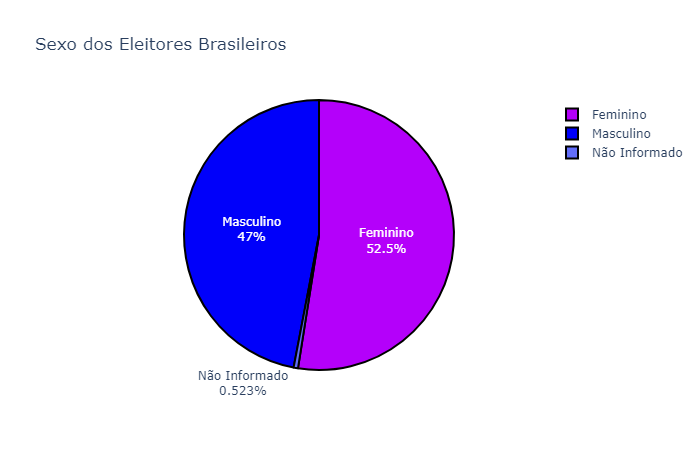

In [13]:
labels = ['Feminino','Masculino','Não Informado']
colors = ['#b400fa', '#0000fa']

fig = go.Figure(data=[go.Pie(labels=labels, values=eleitorado.DS_GENERO.value_counts(normalize=True),
                             textinfo='label+percent',
                             rotation = 0)])
fig.update_layout(title_text='Sexo dos Eleitores Brasileiros')
fig.update_traces(marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show('png')

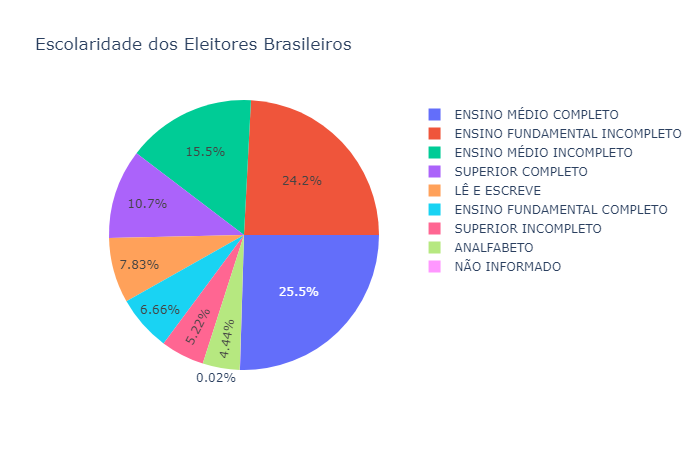

In [15]:
labels = eleitores.DS_GRAU_ESCOLARIDADE
values = eleitores.QT_ELEITORES_PERFIL

fig = go.Figure(data=[go.Pie(labels=labels, values=values,
                             textinfo='percent',
                             rotation = 90)])

fig.update_layout(title_text='Escolaridade dos Eleitores Brasileiros')

fig.show('png')

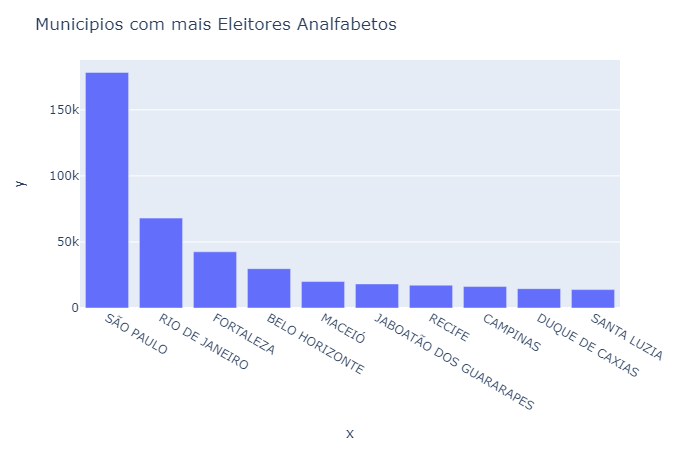

In [16]:
x = analfabeto_por_municipio.NM_MUNICIPIO[:10]
y = analfabeto_por_municipio.QT_ELEITORES_PERFIL[:10]

fig = px.bar(analfabeto_por_municipio, x=x, y=y)
fig.update_layout(barmode='group')
fig.update_layout(title_text='Municipios com mais Eleitores Analfabetos')
fig.show('png')

In [17]:
# Importa a localização dos Estados Brasileiros
br_estados = 'br_states.json'
geo_json_data = json.load(open(br_estados))

In [18]:
# Cria um mapa 
mapa = folium.Map(width=800,
                  height=600,
                  location=[-15.77972, -47.92972],
                  zoom_start=4)

In [19]:
# Cria um mapa atravéz da biblioteca Folium e cruza as informações contidas no Dataset 
mapa.choropleth(
    geo_data = geo_json_data,
    name = 'Numero de Eleitores analfabetos',
    data = analfabeto_por_estado,
    columns=['SG_UF', 'QT_ELEITORES_PERFIL'],
    key_on = 'feature.id',
    fill_color='Reds',
    fill_opacity=0.8,
    line_color='white',
    line_opacity=0.5,
    show='png')

C:\Users\vinic\Anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning:

The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.



# Estados com os maiores indíces de analfabetismo no Brasil 

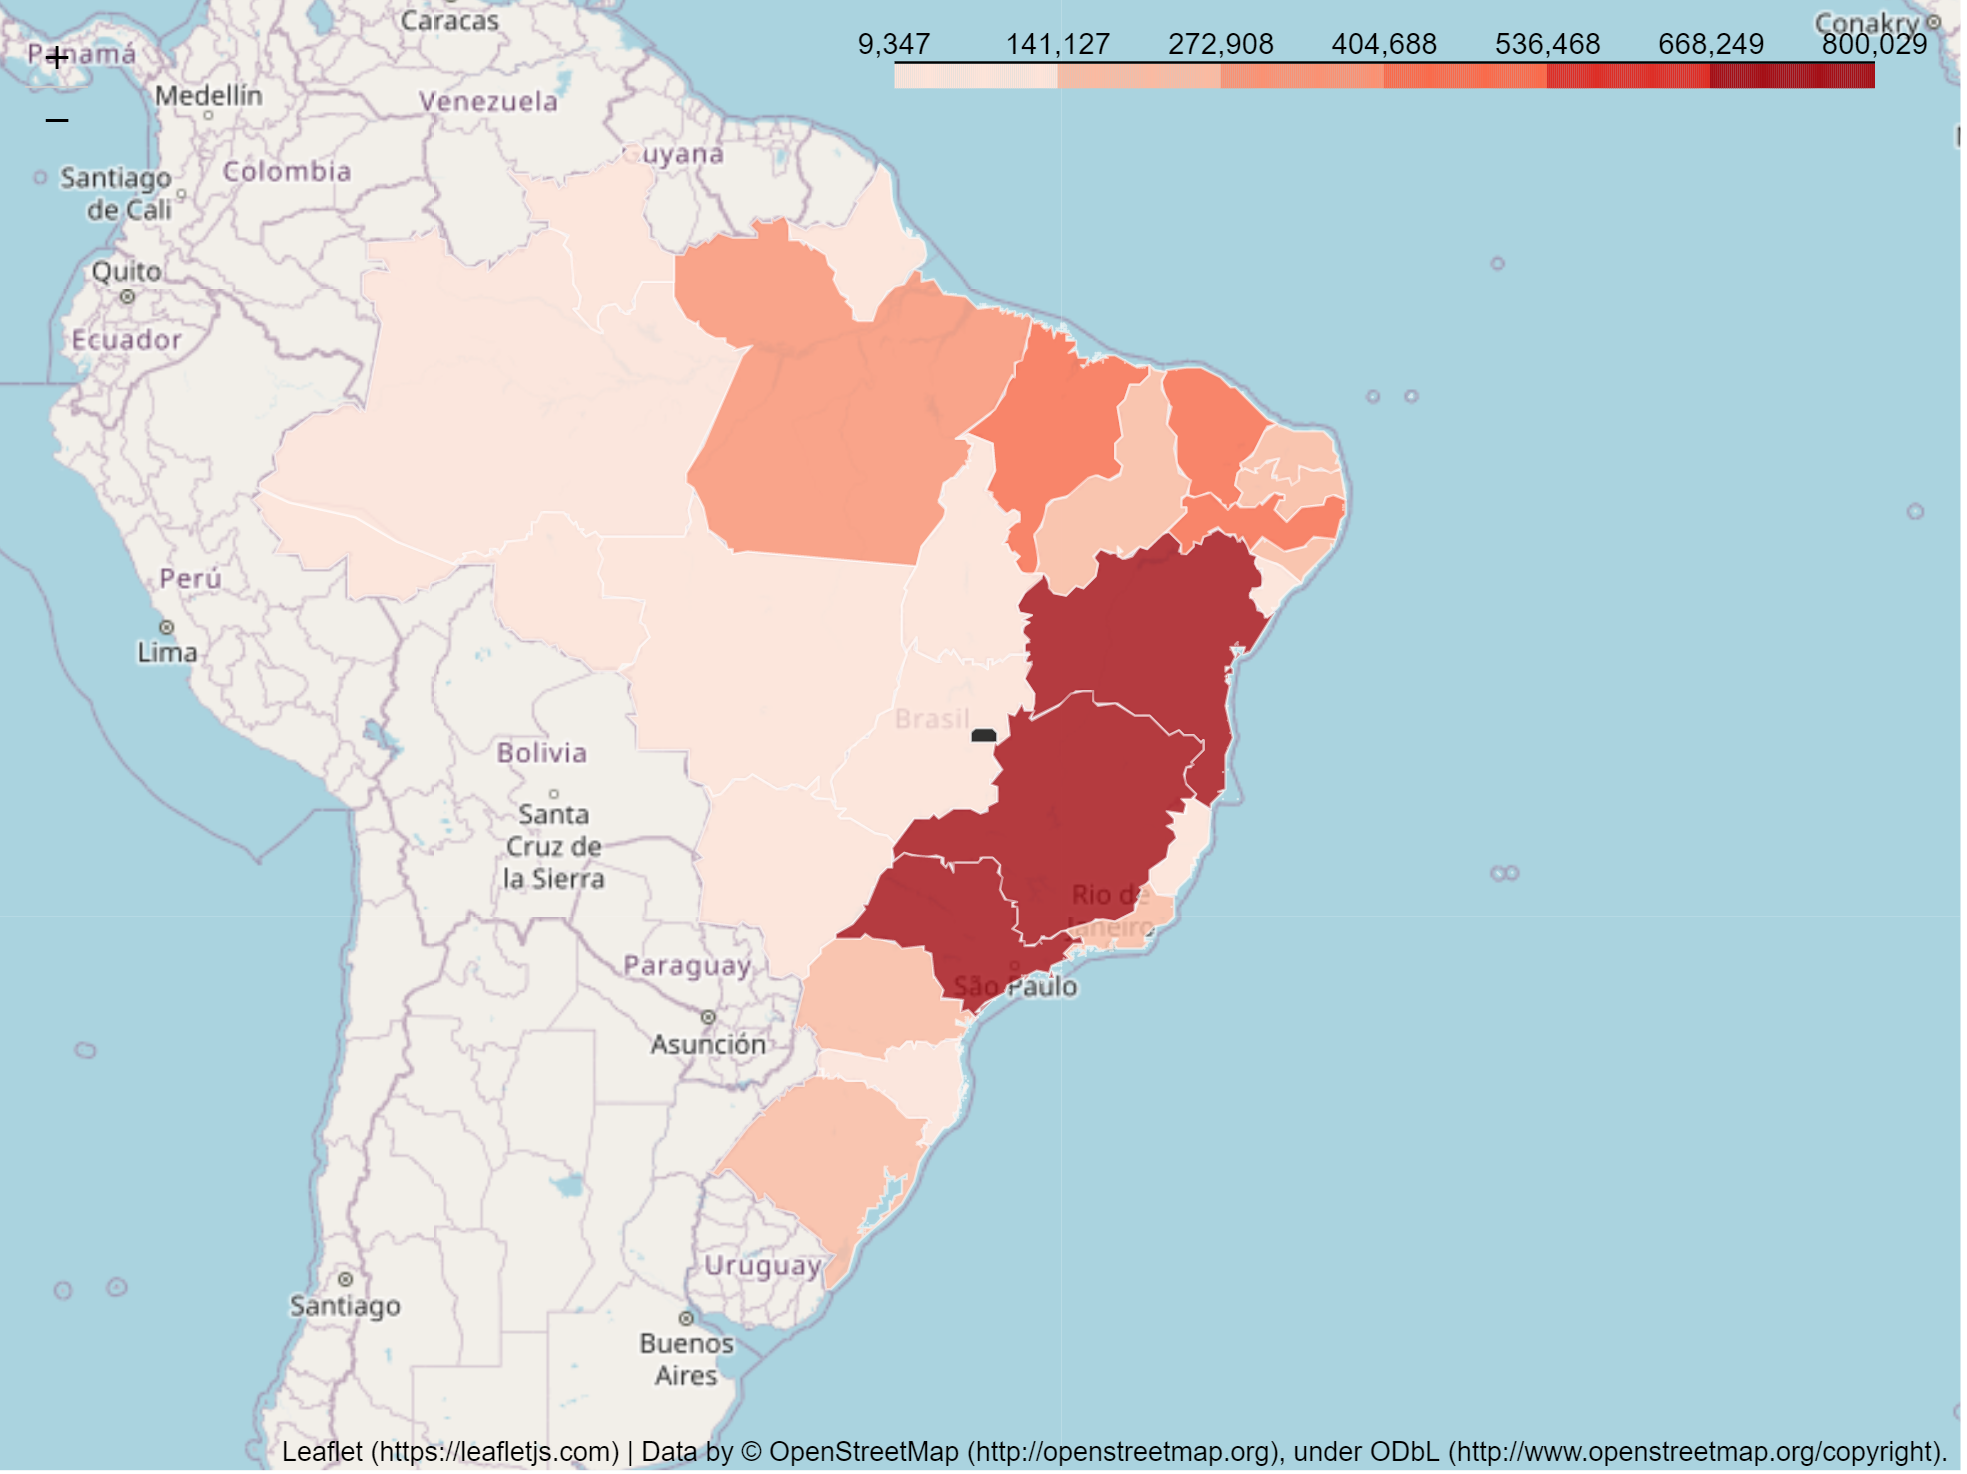

In [6]:
# Mapa dos Estados com maior numero de eleitores analfabetos
from IPython.display import Image
Image(filename='mapa.png') 

FONTE: https://www.tse.jus.br/eleicoes/estatisticas/repositorio-de-dados-eleitorais-1/repositorio-de-dados-eleitorais

Conclusão: A partir dos dados contidos no DataSet conseguimos extrair informações basicas e importantes sobre o eleitorado Brasileiro,como a porcentagem do sexo dos eleitores e mapear as regiões com os maiores indíces de analfabetismo do Brasil